# SimplicialCliqueLifting Tutorial

In [1]:
import rootutils
import json

rootutils.setup_root("./", indicator=".project-root", pythonpath=True)
root_folder = rootutils.find_root()
import omegaconf
from modules.io.load.loaders import GraphLoader

# Load Dataset Config

Either we keep yaml config files and provide a brief overview of them, or we build the required config files by hand in these tutorials. (I prefer the former option.)

In [2]:
dataset_name = "manual_dataset"
dataset_config = omegaconf.OmegaConf.load(
    f"{root_folder}/configs/dataset/{dataset_name}.yaml"
).parameters

#### Print dataset config

In [3]:
# Print config file for nice visualization
dict2print = dataset_config.copy()
print(json.dumps(dict(dict2print), indent=4))

{
    "data_domain": "graph",
    "data_type": "manual_dataset",
    "data_name": "manual",
    "data_dir": "/home/lev/projects/challenge-icml-2024/datasets/graph/manual_dataset",
    "num_features": 1,
    "num_classes": 2,
    "task": "classification",
    "loss_type": "cross_entropy",
    "monitor_metric": "accuracy",
    "task_level": "node",
    "split_type": "k-fold",
    "k": 10,
    "data_seed": 0
}


# Load Transform Config file

Same dilemma as before, yaml files or dicts within tutorials.

In [4]:
# Define lifting type
lifting_type = "graph2simplicial"

# Define lifting id (name)
id_lifting = "clique_lifting"

# Read yaml file
transform_config = {
    "lifting": omegaconf.OmegaConf.load(
        f"{root_folder}/configs/transforms/liftings/{lifting_type}/{id_lifting}.yaml"
    )
    # other transforms (e.g. data manipulations, feature liftings) can be added here
}

### Print transform config

In [5]:
# Print config file for nice visualization
dict2print = transform_config.copy()
dict2print["lifting"] = dict(dict2print["lifting"])

print(json.dumps(dict(dict2print), sort_keys=True, indent=4))

{
    "lifting": {
        "_target_": "modules.transforms.data_transform.DataTransform",
        "complex_dim": 3,
        "feature_lifting": "SumLifting",
        "preserve_edge_attr": false,
        "signed": true,
        "transform_name": "SimplicialCliqueLifting",
        "transform_type": "lifting"
    }
}


### Load Dataset

In [6]:
dataset = GraphLoader(dataset_config, transform_config).load()

Transform parameters are the same, using existing data_dir: /home/lev/projects/challenge-icml-2024/datasets/graph/manual_dataset/manual/lifting/3965133190


/home/lev/miniconda3/envs/topo/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


### Visualize graph

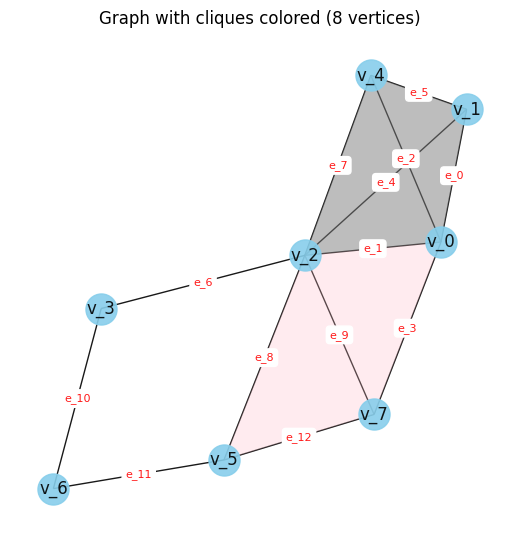

In [7]:
from modules.io.utils.utils import plot_manual_graph

plot_manual_graph(dataset)

### Create a Neural Network Model

In [8]:
from topomodelx.nn.simplicial.san import SAN
import torch


class Network(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, n_layers=1):
        super().__init__()
        self.base_model = SAN(
            in_channels=in_channels,
            hidden_channels=hidden_channels,
            n_layers=n_layers,
        )
        self.linear = torch.nn.Linear(hidden_channels, out_channels)

    def forward(self, data):
        x = self.base_model(data.x_1, data.up_laplacian_1, data.down_laplacian_1)
        x = self.linear(x)
        return torch.sigmoid(x)

### Run the Model

In [9]:
n_layers = 2
in_channels = dataset_config["num_features"]
hidden_channels = 32
out_channels = dataset_config["num_classes"]

model = Network(
    in_channels=in_channels,
    hidden_channels=hidden_channels,
    out_channels=out_channels,
    n_layers=n_layers,
)

In [10]:
y_hat = model(dataset)

Note that for simplicity and visualization reason we utilised simple graph, however there is a set of available datasets that you can play with.

In [12]:
dataset_names = [
    # Working datasets:
    "cocitation_cora",
    "cocitation_citeseer",
    "cocitation_pubmed",
    "MUTAG",
    "NCI1",
    "NCI109",
    # Something is wrong with the following datasets:
    # "IMDB-BINARY",
    # "IMDB-MULTI",
    # "REDDIT-BINARY",
]
for dataset_name in dataset_names:
    dataset_config = omegaconf.OmegaConf.load(
        f"{root_folder}/configs/dataset/{dataset_name}.yaml"
    ).parameters

    dataset = GraphLoader(dataset_config, transform_config).load()

# Define lifting type
# lifting_type = "graph2simplicial"

# # Define lifting id (name)
# id_lifting = "simplicial_clique"

# # Read yaml file
# transform_config = {
#     "lifting": omegaconf.OmegaConf.load(
#         f"{root_folder}/configs/transforms/topological_liftings/{lifting_type}/{id_lifting}.yaml"
#     )
#     # other transforms (e.g. data manipulations, feature liftings) can be added here
# }

Processing...
Done!
Processing...
/home/lev/miniconda3/envs/topo/lib/python3.11/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
Done!
Processing...
Done!
Processing...
/home/lev/miniconda3/envs/topo/lib/python3.11/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
Done!
Processing...
Done!
Processing...
/home/lev/miniconda3/envs/topo/lib/python3.11/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
Processing...
Done!
